In [1]:
import numpy as np 
import astropy.units as u
# -- feasibgs --
from feasibgs import util as UT
from feasibgs import skymodel as Sky
from feasibgs import forwardmodel as FM
# -- desi -- 
import desimodel.io
import desisim.simexp

In [2]:
import matplotlib as mpl 
import matplotlib.pyplot as pl 
mpl.rcParams['text.usetex'] = True
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['axes.linewidth'] = 1.5
mpl.rcParams['axes.xmargin'] = 1
mpl.rcParams['xtick.labelsize'] = 'x-large'
mpl.rcParams['xtick.major.size'] = 5
mpl.rcParams['xtick.major.width'] = 1.5
mpl.rcParams['ytick.labelsize'] = 'x-large'
mpl.rcParams['ytick.major.size'] = 5
mpl.rcParams['ytick.major.width'] = 1.5
mpl.rcParams['legend.frameon'] = False
%matplotlib inline

In [3]:
params = desimodel.io.load_desiparams() 
wavemin = params['ccd']['b']['wavemin']
wavemax = params['ccd']['z']['wavemax']
print('%f < lambda < %f' % (wavemin, wavemax))

waves = np.arange(wavemin, wavemax, 0.2) * u.angstrom
config = desisim.simexp._specsim_config_for_wave((waves).to('Angstrom').value, specsim_config_file='desi')
surface_brightness_dict = config.load_table(config.atmosphere.sky, 'surface_brightness', as_dict=True)

3533.000000 < lambda < 9913.000000


Default dark sky surface brightness currently used in `specsim`

(0.0, 10.0)

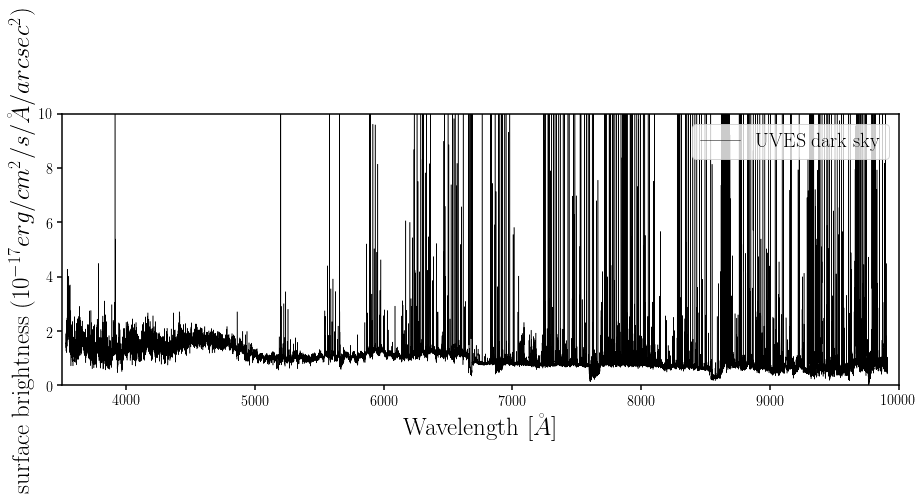

In [26]:
fig = plt.figure(figsize=(15,5))
sub = fig.add_subplot(111)
sub.plot(waves, surface_brightness_dict['dark'], c='k', lw=0.5, label='UVES dark sky')
#sub.plot(uves_sky_bright[0], uves_sky_bright[1], c='C1', lw=0.5, label='UVES bright sky')
sub.legend(loc='upper right', fontsize=20, frameon=True)
sub.set_xlabel(r'Wavelength [$\AA$]', fontsize=25)
sub.set_xlim([3500., 1.e4])
sub.set_ylabel(r"surface brightness ($10^{-17} erg/cm^{2}/s/\AA/arcsec^2$)", fontsize=25)
sub.set_ylim([0., 10.])

In [16]:
desi = FM.SimulatorHacked(config, num_fibers=1, camera_output=True)
airmass = 1.4
alt = 42.18
sep = 69.
ill = 0.42 
desi.atmosphere.airmass = airmass
desi.atmosphere.moon.moon_phase = np.arccos(2.*ill - 1)/np.pi #moon_phase/np.pi #np.arccos(2*moonfrac-1)/np.pi
desi.atmosphere.moon.moon_zenith = (90. - alt) * u.deg
desi.atmosphere.moon.separation_angle = sep * u.deg

(0.0, 10.0)

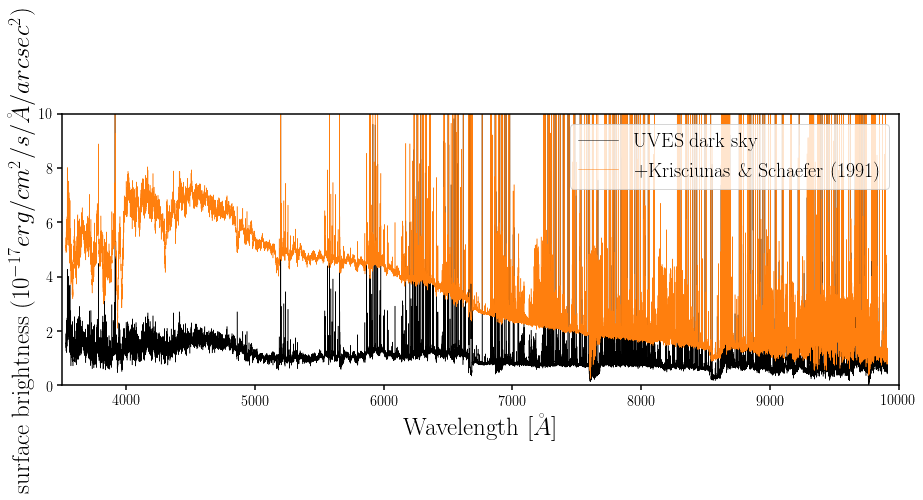

In [27]:
fig = plt.figure(figsize=(15,5))
sub = fig.add_subplot(111)
sub.plot(waves, surface_brightness_dict['dark'], 
         c='k', lw=0.5, label='UVES dark sky')
sub.plot(waves, surface_brightness_dict['dark'] + desi.atmosphere.moon.surface_brightness, 
         c='C1', lw=0.5, label=r'+Krisciunas $\&$ Schaefer (1991)')
sub.legend(loc='upper right', fontsize=20, frameon=True)
sub.set_xlabel(r'Wavelength [$\AA$]', fontsize=25)
sub.set_xlim([3500., 1.e4])
sub.set_ylabel(r"surface brightness ($10^{-17} erg/cm^{2}/s/\AA/arcsec^2$)", fontsize=25)
sub.set_ylim([0., 10.])

In [18]:
fakedesi = FM.fakeDESIspec()

(0.0, 10.0)

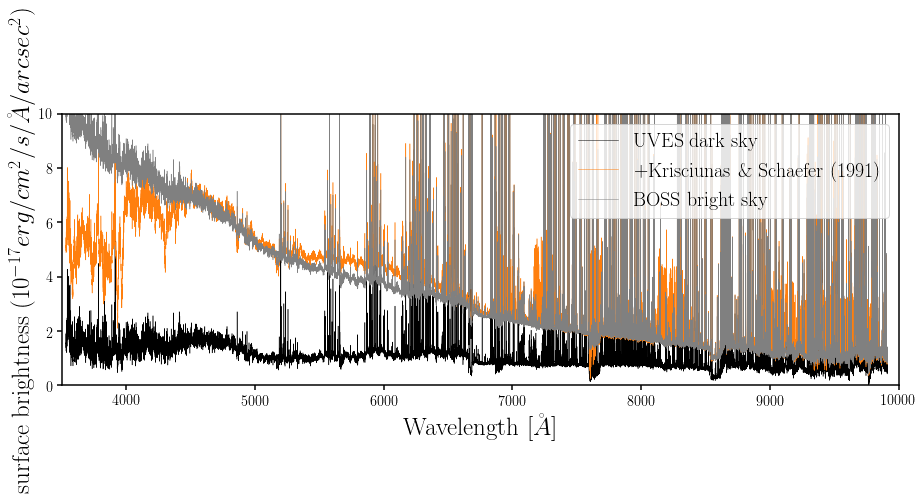

In [28]:
fig = plt.figure(figsize=(15,5))
sub = fig.add_subplot(111)
sub.plot(waves, surface_brightness_dict['dark'], 
         c='k', lw=0.5, label='UVES dark sky')
sub.plot(waves, surface_brightness_dict['dark'] + desi.atmosphere.moon.surface_brightness, 
         c='C1', lw=0.5, label=r'+Krisciunas $\&$ Schaefer (1991)')
sub.plot(waves, fakedesi._skySurfBright(waves, cond='bright'), 
         c='gray', lw=0.5, label='BOSS bright sky')
sub.legend(loc='upper right', fontsize=20, frameon=True)
sub.set_xlabel(r'Wavelength [$\AA$]', fontsize=25)
sub.set_xlim([3500., 1.e4])
sub.set_ylabel(r"surface brightness ($10^{-17} erg/cm^{2}/s/\AA/arcsec^2$)", fontsize=25)
sub.set_ylim([0., 10.])

In [20]:
theta_sky = (airmass, 30., 10., 180., 4.86761390e+09, -25., 150., np.arccos(2.*ill - 1), ill, sep, alt)
sky_obj = Sky.skySpec(*theta_sky)

(0.0, 10.0)

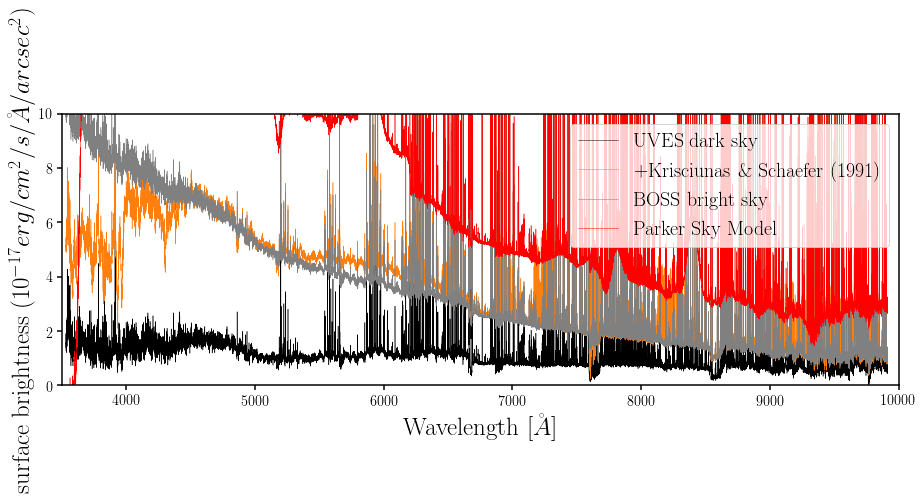

In [29]:
fig = plt.figure(figsize=(15,5))
sub = fig.add_subplot(111)
sub.plot(waves, surface_brightness_dict['dark'], 
         c='k', lw=0.5, label='UVES dark sky')
sub.plot(waves, surface_brightness_dict['dark'] + desi.atmosphere.moon.surface_brightness, 
         c='C1', lw=0.5, label=r'+Krisciunas $\&$ Schaefer (1991)')
sub.plot(waves, fakedesi._skySurfBright(waves, cond='bright'), 
         c='gray', lw=0.5, label='BOSS bright sky')
sub.plot(waves, sky_obj.surface_brightness(waves), 
         c='r', lw=0.5, label=r'Parker Sky Model')
sub.legend(loc='upper right', fontsize=20, frameon=True)
sub.set_xlabel(r'Wavelength [$\AA$]', fontsize=25)
sub.set_xlim([3500., 1.e4])
sub.set_ylabel(r"surface brightness ($10^{-17} erg/cm^{2}/s/\AA/arcsec^2$)", fontsize=25)
sub.set_ylim([0., 10.])

(0.0, 10.0)

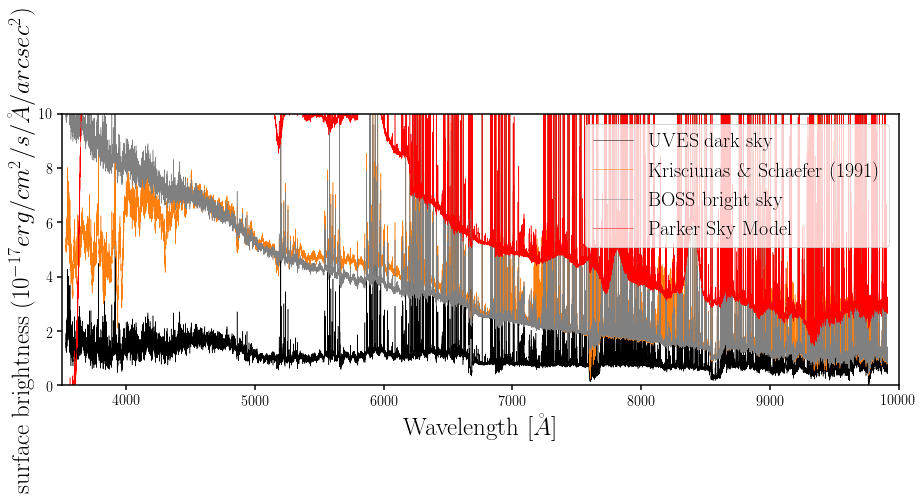

In [24]:
desi = FM.SimulatorHacked(config, num_fibers=1, camera_output=True)
airmass = 1.4
alt = 42.18
sep = 69.
ill = 0.8
desi.atmosphere.airmass = airmass
desi.atmosphere.moon.moon_phase = np.arccos(2.*ill - 1)/np.pi #moon_phase/np.pi #np.arccos(2*moonfrac-1)/np.pi
desi.atmosphere.moon.moon_zenith = (90. - alt) * u.deg
desi.atmosphere.moon.separation_angle = sep * u.deg

theta_sky = (airmass, 30., 10., 180., 4.86761390e+09, -25., 150., np.arccos(2.*ill - 1), ill, sep, alt)
sky_obj = Sky.skySpec(*theta_sky)
fig = plt.figure(figsize=(15,5))
sub = fig.add_subplot(111)
sub.plot(waves, surface_brightness_dict['dark'], 
         c='k', lw=0.5, label='UVES dark sky')
sub.plot(waves, surface_brightness_dict['dark'] + desi.atmosphere.moon.surface_brightness, 
         c='C1', lw=0.5, label=r'+Krisciunas $\&$ Schaefer (1991)')
sub.plot(waves, fakedesi._skySurfBright(waves, cond='bright'), 
         c='gray', lw=0.5, label='BOSS bright sky')
sub.plot(waves, sky_obj.surface_brightness(waves), 
         c='r', lw=0.5, label=r'Parker Sky Model')
sub.legend(loc='upper right', fontsize=20, frameon=True)
sub.set_xlabel(r'Wavelength [$\AA$]', fontsize=25)
sub.set_xlim([3500., 1.e4])
sub.set_ylabel(r"surface brightness ($10^{-17} erg/cm^{2}/s/\AA/arcsec^2$)", fontsize=25)
sub.set_ylim([0., 10.])